<a href="https://colab.research.google.com/github/pnkcompany/Artificial_Intelligence/blob/main/hw2/19593_Priyanka_Muchandikar_q4_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd
from sklearn.tree  import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn import tree

#Reading Dataset
l=[[3.25,7.956,2],
[3.3,2.2,0],
[3.32,3.41,0],
[3.35,10.272,2],
[4.01,1.65,0],
[4.03,2.51,0],
[4.05,4.21,0],
[4.05,7.38,2],
[4.06,11.412,2],
[4.07,9.198,2],
[5.22,2.15,0],
[5.24,3.41,0],
[5.25,7.866,2],
[8.15,6.3,1],
[8.23,7.95,1],
[9.38,7.34,1],
[9.4,8.21,1],
[10.2,6.52,1],
[10.8,7.72,1],
[4.01,3.02,'?'],
[9.1,6.5,'?'],
[3.50,9.50,'?'],
[6.01,6.01,'?']]


df = pd.DataFrame(l, columns=['X1','X2','Y'])

#prepocess data
for i in df.columns:
  df.loc[df[i]=='?',i]=np.nan


#splitting into train and test
test_data = df[-4:]

train_data = df[:-4]


X = train_data[['X1','X2']]
y = train_data['Y'].astype('int')

classifier_dt =  DecisionTreeClassifier()


#Fit the data into model
classifier_dt.fit(X, y)

#Predict the new data
pred = classifier_dt.predict(test_data[['X1','X2']])



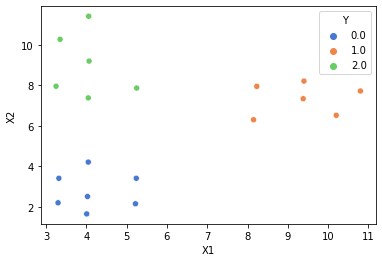

In [62]:
#concating data to original
t = test_data[['X1','X2']]
t['Y'] = pred


df = pd.concat([df[:-4],t])

#plotting points
import seaborn as sns
sns.scatterplot(x="X1", y="X2", hue=y,palette="muted", data=df)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


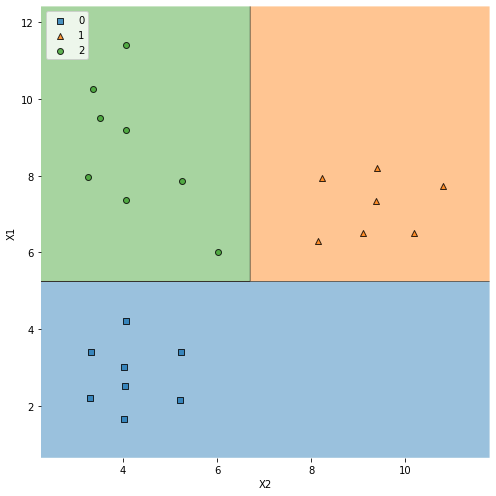

In [72]:
 

X_combined = np.vstack((X,  test_data[['X1','X2']]))
y_combined = np.hstack((y, t['Y']))
 
fig, ax = plt.subplots(figsize=(7, 7))
plot_decision_regions(X_combined, y_combined, clf=classifier_dt)
plt.xlabel('X2')
plt.ylabel('X1')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()






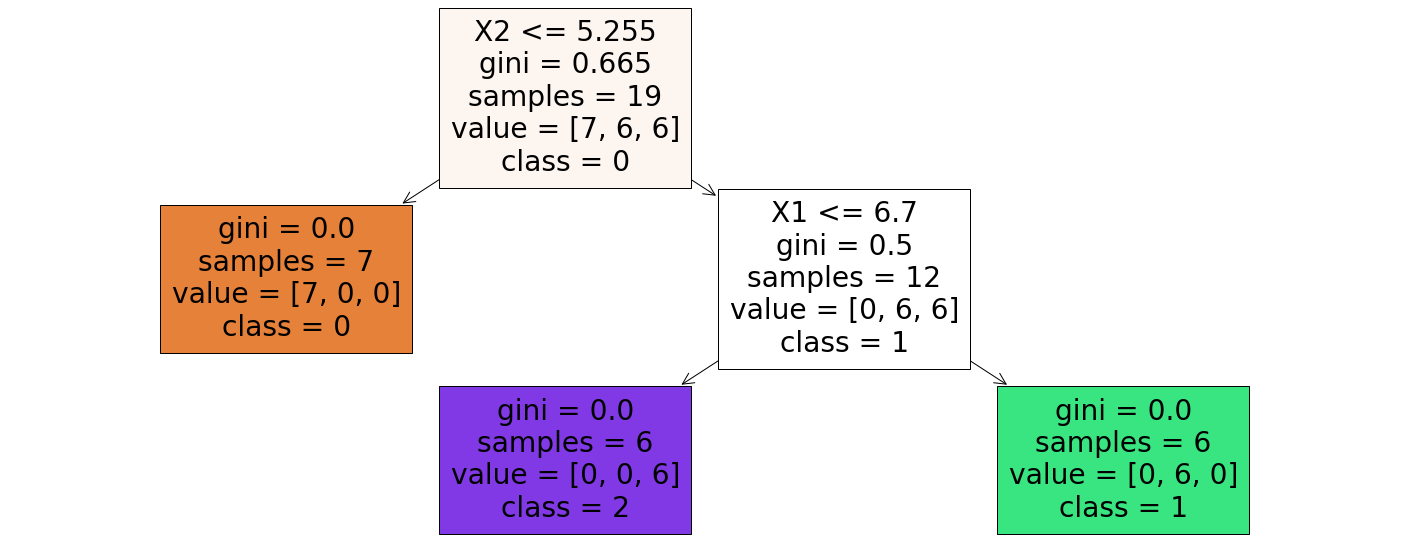

In [75]:
#plotting decision line
plt.figure(figsize=(25,10))
plot_tree(classifier_dt, feature_names = df.columns,class_names=['0','1','2'],filled=True);